In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Функция для вычисления PSNR
def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

In [9]:
# Загрузка изображения в градациях серого
img = cv2.imread('sar_1.jpg', cv2.IMREAD_GRAYSCALE)

# Добавление гауссовского шума
gn = np.random.normal(0, 25, img.shape).astype(np.uint8)
img_gn = cv2.add(img, gn)

# Добавление равномерного шума
un = np.random.uniform(-50, 50, img.shape).astype(np.uint8)
img_un = cv2.add(img, un)

In [10]:
# Параметры фильтрации
kernel_sizes = [3, 5] 
sigma_values = [1, 2] 
d_values = [5, 9] 
h_values = [10, 20] 

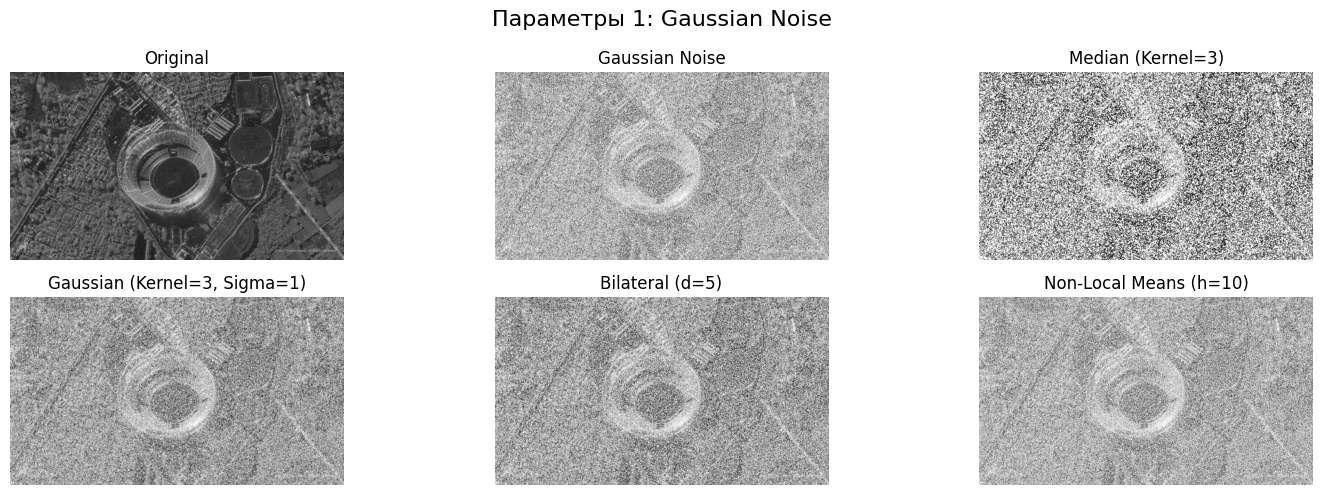

PSNR for Median Filter (Gaussian, Kernel=3): 27.5658641173502
PSNR for Gaussian Filter (Gaussian, Kernel=3, Sigma=1): 27.854680206081564
PSNR for Bilateral Filter (Gaussian, d=5): 27.63118943911891
PSNR for Non-Local Means (Gaussian, h=10): 28.105511651434103


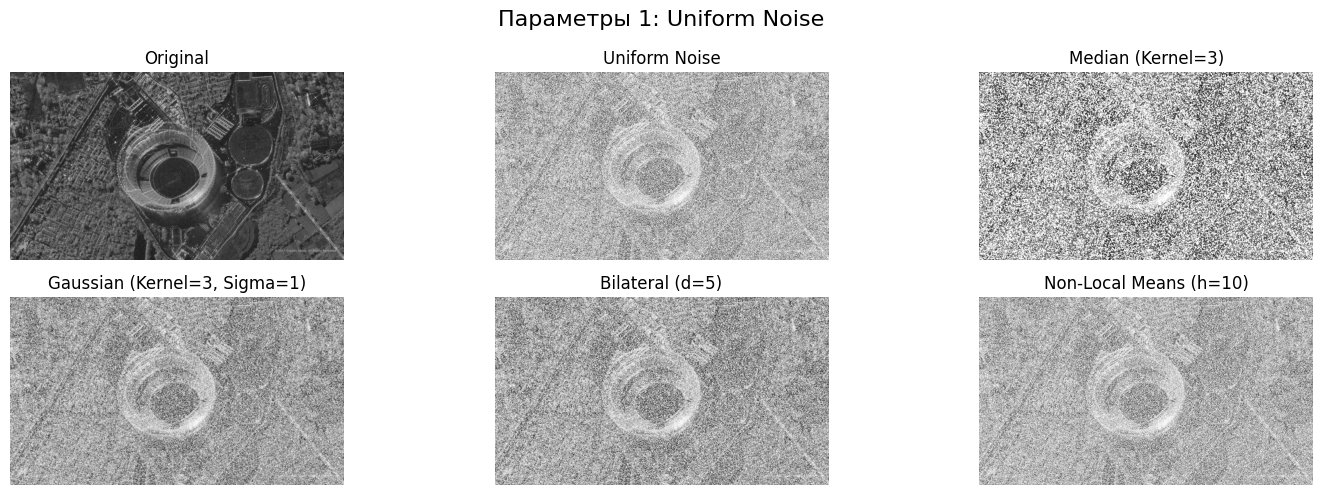

PSNR for Median Filter (Uniform, Kernel=3): 27.500749469739926
PSNR for Gaussian Filter (Uniform, Kernel=3, Sigma=1): 27.891272073665125
PSNR for Bilateral Filter (Uniform, d=5): 27.602594245770216
PSNR for Non-Local Means (Uniform, h=10): 27.867079002606356


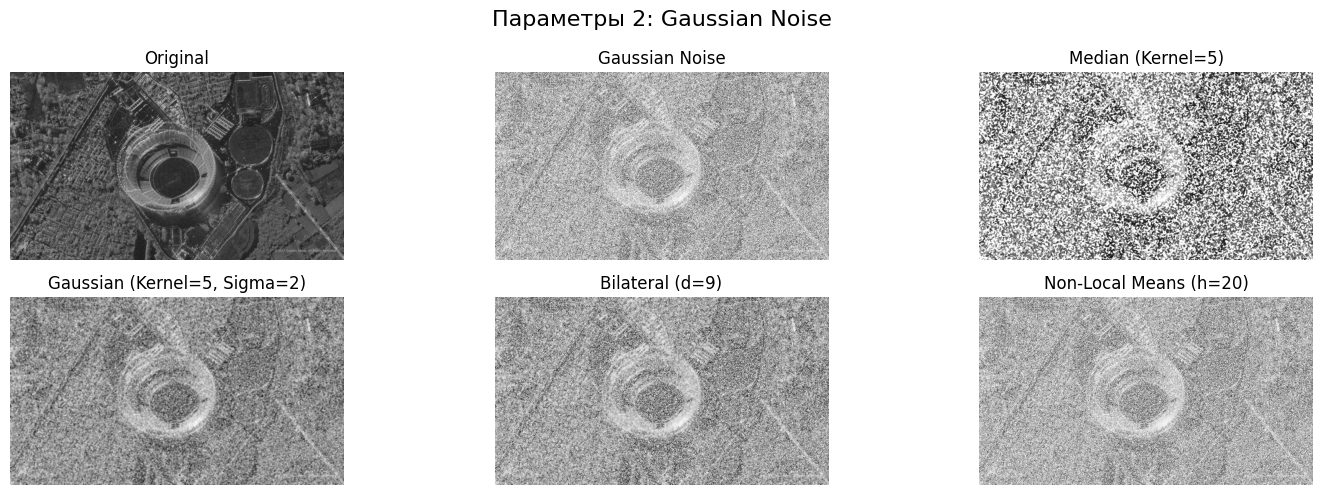

PSNR for Median Filter (Gaussian, Kernel=5): 27.542595668046342
PSNR for Gaussian Filter (Gaussian, Kernel=5, Sigma=2): 27.852987225817714
PSNR for Bilateral Filter (Gaussian, d=9): 27.61711209893548
PSNR for Non-Local Means (Gaussian, h=20): 28.10301602980357


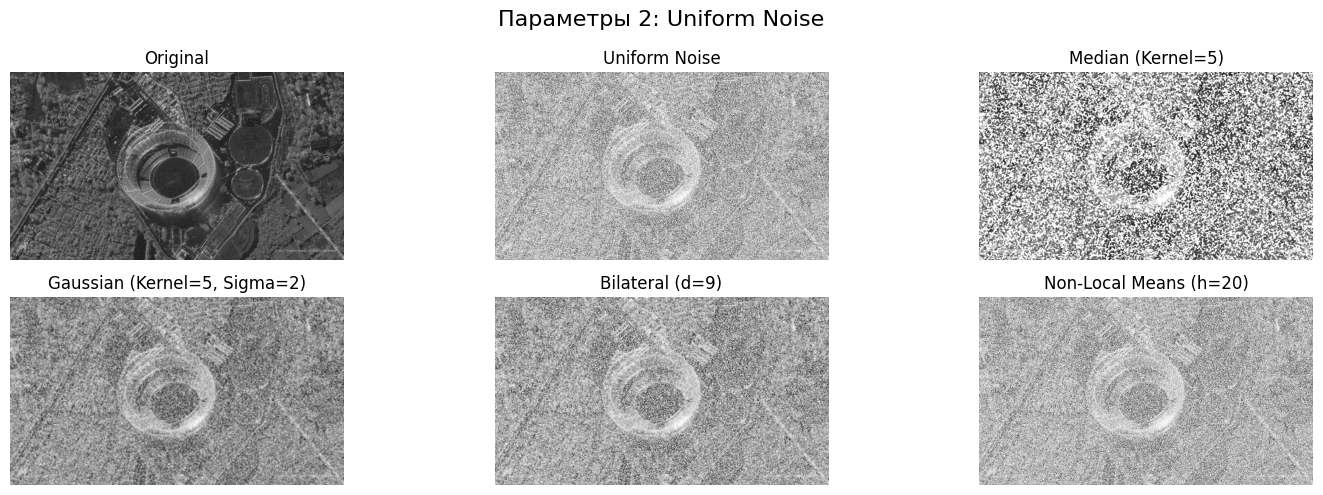

PSNR for Median Filter (Uniform, Kernel=5): 27.511825338913766
PSNR for Gaussian Filter (Uniform, Kernel=5, Sigma=2): 27.92961264602541
PSNR for Bilateral Filter (Uniform, d=9): 27.590231894937375
PSNR for Non-Local Means (Uniform, h=20): 27.86588332142943


In [11]:
for i in range(2): 
    kernel_size = kernel_sizes[i]
    sigma = sigma_values[i]
    d = d_values[i]
    h = h_values[i]

    # Применение фильтров к изображению с гауссовским шумом
    mf_gn = cv2.medianBlur(img_gn, kernel_size) 
    gf_gn = cv2.GaussianBlur(img_gn, (kernel_size, kernel_size), sigma)  
    bf_gn = cv2.bilateralFilter(img_gn, d, 75, 75) 
    nlm_gn = cv2.fastNlMeansDenoising(img_gn, None, h, 7, 21) 

    # Применение фильтров к изображению с равномерным шумом
    mf_un = cv2.medianBlur(img_un, kernel_size)  
    gf_un = cv2.GaussianBlur(img_un, (kernel_size, kernel_size), sigma)  
    bf_un = cv2.bilateralFilter(img_un, d, 75, 75)  
    nlm_un = cv2.fastNlMeansDenoising(img_un, None, h, 7, 21)  
    
    # Отображение результатов для гауссовского шума
    titles_gn = ['Original', 'Gaussian Noise',
                 f'Median (Kernel={kernel_size})', f'Gaussian (Kernel={kernel_size}, Sigma={sigma})',
                 f'Bilateral (d={d})', f'Non-Local Means (h={h})']
    images_gn = [img, img_gn, mf_gn, gf_gn, bf_gn, nlm_gn]

    plt.figure(figsize=(15, 5))
    plt.suptitle(f'Параметры {i + 1}: Gaussian Noise', fontsize=16)
    for j in range(len(images_gn)):
        plt.subplot(2, 3, j + 1)
        plt.imshow(images_gn[j], cmap='gray')
        plt.title(titles_gn[j])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Вычисление PSNR для гауссовского шума
    print(f"PSNR for Median Filter (Gaussian, Kernel={kernel_size}):", psnr(img, mf_gn))
    print(f"PSNR for Gaussian Filter (Gaussian, Kernel={kernel_size}, Sigma={sigma}):", psnr(img, gf_gn))
    print(f"PSNR for Bilateral Filter (Gaussian, d={d}):", psnr(img, bf_gn))
    print(f"PSNR for Non-Local Means (Gaussian, h={h}):", psnr(img, nlm_gn))

    # Отображение результатов для равномерного шума
    titles_un = ['Original', 'Uniform Noise',
                 f'Median (Kernel={kernel_size})', f'Gaussian (Kernel={kernel_size}, Sigma={sigma})',
                 f'Bilateral (d={d})', f'Non-Local Means (h={h})']
    images_un = [img, img_un, mf_un, gf_un, bf_un, nlm_un]

    plt.figure(figsize=(15, 5))
    plt.suptitle(f'Параметры {i + 1}: Uniform Noise', fontsize=16)
    for j in range(len(images_un)):
        plt.subplot(2, 3, j + 1)
        plt.imshow(images_un[j], cmap='gray')
        plt.title(titles_un[j])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Вычисление PSNR для равномерного шума
    print(f"PSNR for Median Filter (Uniform, Kernel={kernel_size}):", psnr(img, mf_un))
    print(f"PSNR for Gaussian Filter (Uniform, Kernel={kernel_size}, Sigma={sigma}):", psnr(img, gf_un))
    print(f"PSNR for Bilateral Filter (Uniform, d={d}):", psnr(img, bf_un))
    print(f"PSNR for Non-Local Means (Uniform, h={h}):", psnr(img, nlm_un))

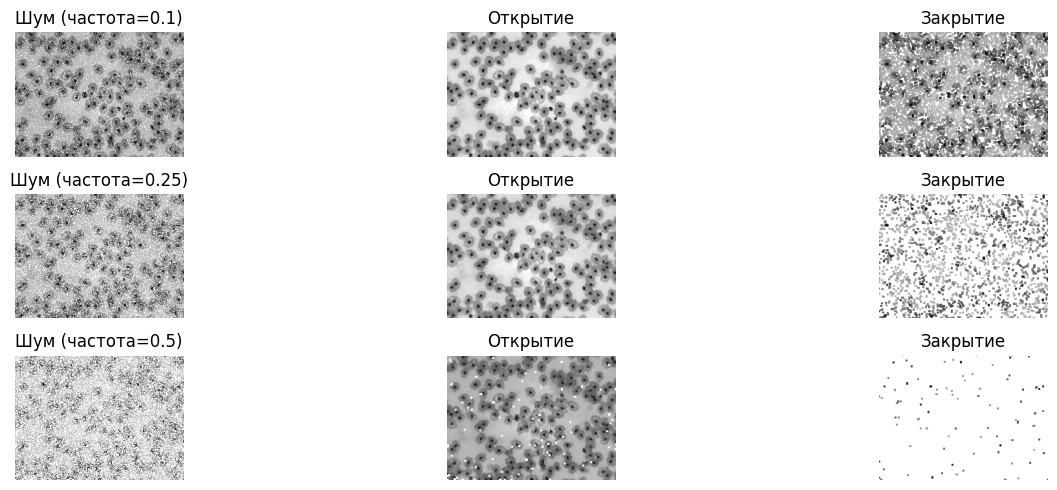

In [12]:
# Загрузка другого изображения для обработки
img2 = cv2.imread('cells_2.jpg', cv2.IMREAD_GRAYSCALE)

# Параметры для создания шумов
frequencies = [0.1, 0.25, 0.5]  
kernel = np.ones((3, 3), np.uint8) 

plt.figure(figsize=(15, 5))
for i, freq in enumerate(frequencies):
    # Генерация случайного шума
    spn = np.random.choice([0, 255], size=img2.shape, p=[1 - freq, freq])
    spn = spn.astype(np.uint8)  
    img2_sp = cv2.add(img2, spn)

    # Применение морфологических операций
    opening = cv2.morphologyEx(img2_sp, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(img2_sp, cv2.MORPH_CLOSE, kernel)

    # Отображение результатов
    plt.subplot(3, 3, i * 3 + 1)
    plt.imshow(img2_sp, cmap='gray')
    plt.title(f'Шум (частота={freq})')
    plt.axis('off')

    plt.subplot(3, 3, i * 3 + 2)
    plt.imshow(opening, cmap='gray')
    plt.title('Открытие')
    plt.axis('off')

    plt.subplot(3, 3, i * 3 + 3)
    plt.imshow(closing, cmap='gray')
    plt.title('Закрытие')
    plt.axis('off')

plt.tight_layout()
plt.show()